# Imports

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, f1_score

from sklearn.model_selection import train_test_split

# Load Data

In [9]:
data = pd.read_csv("data/data_cleaned.csv")

# Data Preparation

In [10]:
# one hot
data = pd.get_dummies(data, prefix = ["HEAT", "AC", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"], columns = ["HEAT", "AC", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"])

In [11]:
# split
x_data = data.drop(["PRICE"], axis=1)
y_data = data["PRICE"]

In [12]:
# normalization
x_data = x_data.astype(float)
x_data = x_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [13]:
# train & test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

# Linear Regression

Score: -1.97445717476e+17
R2 Score: -1.97445717476e+17
Mean squared error: 6.97885754118e+28


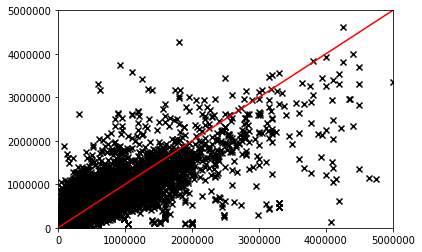

In [17]:
linreg = LinearRegression(n_jobs = -1)
linreg.fit(x_train, y_train)

y_pred_lin = linreg.predict(x_test)

lin_score = linreg.score(x_test, y_test)
lin_msqe = mean_squared_error(y_test, y_pred_lin)

print("Score: " + str(lin_score))
print("R2 Score: " + str(r2_score(y_test, y_pred_lin)))
print("Mean squared error: " + str(lin_msqe))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lin, c='black', marker="x")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
ax.add_line(line)
plt.show()

In [16]:
pd.set_option('display.max_columns', 500)
pd.DataFrame(linreg.coef_.reshape((1,252)), columns=x_train.columns)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,STORIES,SALE_NUM,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,LATITUDE,LONGITUDE,SalevYB,SalevYI,SalevYR,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_No Data,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,AC_N,AC_Y,QUALIFIED_Q,QUALIFIED_U,STYLE_1 Story,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,STYLE_4 Story,STYLE_4.5 Story Fin,STYLE_4.5 Story Unfin,STYLE_Bi-Level,STYLE_Default,STYLE_Outbuildings,STYLE_Split Foyer,STYLE_Split Level,STYLE_Vacant,STRUCT_Default,STRUCT_Multi,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,STRUCT_Town End,STRUCT_Town Inside,GRADE_Above Average,GRADE_Average,GRADE_Excellent,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,EXTWALL_Adobe,EXTWALL_Aluminum,EXTWALL_Brick Veneer,EXTWALL_Brick/Siding,EXTWALL_Brick/Stone,EXTWALL_Brick/Stucco,EXTWALL_Common Brick,EXTWALL_Concrete,EXTWALL_Concrete Block,EXTWALL_Default,EXTWALL_Face Brick,EXTWALL_Hardboard,EXTWALL_Metal Siding,EXTWALL_Plywood,EXTWALL_SPlaster,EXTWALL_Shingle,EXTWALL_Stone,EXTWALL_Stone Veneer,EXTWALL_Stone/Siding,EXTWALL_Stone/Stucco,EXTWALL_Stucco,EXTWALL_Stucco Block,EXTWALL_Vinyl Siding,EXTWALL_Wood Siding,INTWALL_Carpet,INTWALL_Ceramic Tile,INTWALL_Default,INTWALL_Hardwood,INTWALL_Hardwood/Carp,INTWALL_Lt Concrete,INTWALL_Parquet,INTWALL_Resiliant,INTWALL_Terrazo,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,ROOF_Built Up,ROOF_Clay Tile,ROOF_Comp Shingle,ROOF_Composition Ro,ROOF_Concrete,ROOF_Metal- Cpr,ROOF_Metal- Pre,ROOF_Metal- Sms,ROOF_Neopren,ROOF_Shake,ROOF_Shingle,ROOF_Slate,ROOF_Typical,ROOF_Water Proof,ROOF_Wood- FS,ASSESSMENT_SUBNBHD_001 A American University,ASSESSMENT_SUBNBHD_001 B American University,ASSESSMENT_SUBNBHD_001 C American University,ASSESSMENT_SUBNBHD_002 A Anacostia,ASSESSMENT_SUBNBHD_002 B Anacostia,ASSESSMENT_SUBNBHD_004 A Berkley,ASSESSMENT_SUBNBHD_004 B Berkley,ASSESSMENT_SUBNBHD_004 C Berkley,ASSESSMENT_SUBNBHD_005 A Brentwood,ASSESSMENT_SUBNBHD_005 B Brentwood,ASSESSMENT_SUBNBHD_006 A Brightwood,ASSESSMENT_SUBNBHD_006 B Brightwood,ASSESSMENT_SUBNBHD_006 C Brightwood,ASSESSMENT_SUBNBHD_006 D Brightwood,ASSESSMENT_SUBNBHD_006 E Brightwood,ASSESSMENT_SUBNBHD_007 A Brookland,ASSESSMENT_SUBNBHD_007 B Brookland,ASSESSMENT_SUBNBHD_007 C Brookland,ASSESSMENT_SUBNBHD_007 D Brookland,ASSESSMENT_SUBNBHD_007 E Brookland,ASSESSMENT_SUBNBHD_008 A Burleith,ASSESSMENT_SUBNBHD_008 B Burleith,ASSESSMENT_SUBNBHD_009 A Capitol Hill,ASSESSMENT_SUBNBHD_009 B Capitol Hill,ASSESSMENT_SUBNBHD_009 C Capitol Hill,ASSESSMENT_SUBNBHD_011 A Chevy Chase,ASSESSMENT_SUBNBHD_011 B Chevy Chase,ASSESSMENT_SUBNBHD_011 C Chevy Chase,ASSESSMENT_SUBNBHD_011 D Chevy Chase,ASSESSMENT_SUBNBHD_011 E Chevy Chase,ASSESSMENT_SUBNBHD_015 A Columbia Heights,ASSESSMENT_SUBNBHD_015 B Columbia Heights,ASSESSMENT_SUBNBHD_015 C Columbia Heights,ASSESSMENT_SUBNBHD_015 D Columbia Heights,ASSESSMENT_SUBNBHD_015 E Columbia Heights,ASSESSMENT_SUBNBHD_016 A Congress Heights,ASSESSMENT_SUBNBHD_016 B Congress Heights,ASSESSMENT_SUBNBHD_016 C Congress Heights,ASSESSMENT_SUBNBHD_018 A Deanwood,ASSESSMENT_SUBNBHD_018 B Deanwood,ASSESSMENT_SUBNBHD_018 C Deanwood,ASSESSMENT_SUBNBHD_018 D Deanwood,ASSESSMENT_SUBNBHD_018 E Deanwood,ASSESSMENT_SUBNBHD_019 A Eckington,ASSESSMENT_SUBNBHD_019 B Eckington,ASSESSMENT_SUBNBHD_022 A Fort Dupont Park,ASSESSMENT_SUBNBHD_022 B Fort Dupont Park,ASSESSMENT_SUBNBHD_022 C Fort Dupont Park,ASSESSMENT_SUBNBHD_022 D Fort Dupont Park,ASSESSMENT_SUBNBHD_025 A Georgetown,ASSESSMENT_SUBNBHD_025 B Georgetown,ASSESSMENT_SUBNBHD_025 C George

# Lasso Regression

C:\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:339: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 250 iterations, alpha=9.097e-01, previous alpha=8.536e-01, with an active set of 233 regressors.
  ConvergenceWarning)


Score: 0.367661537465
R2 Score: 0.367661537465
Mean squared error: 223504470204.0


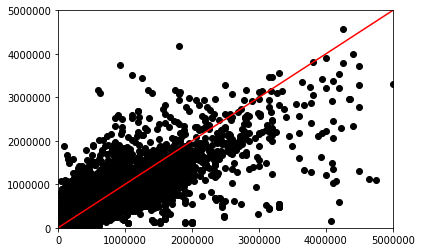

In [25]:
lassoreg = Lasso()
lassoreg.fit(x_train, y_train)

y_pred_lasso = lassoreg.predict(x_test)

lasso_score = lassoreg.score(x_test, y_test)
lasso_msqe = mean_squared_error(y_test, y_pred_lasso)

print("Score: " + str(lasso_score))
print("R2 Score: " + str(r2_score(y_test, y_pred_lasso)))
print("Mean squared error: " + str(lasso_msqe))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lasso, c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
ax.add_line(line)
plt.show()

# Logistic Regression

In [ ]:
logreg = LogisticRegression(n_jobs=-1, solver="sag")
logreg.fit(x_train, y_train)

y_pred_log = logreg.predict(x_test)

lin_score = linreg.score(x_test, y_test)
lin_msqe = mean_squared_error(y_test, y_pred_log)

print("Score: " + str(log_score))
print("R2 Score: " + str(r2_score(y_test, y_pred_log)))
print("Mean squared error: " + str(log_msqe))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_log, c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
plt.xlim(0, 2000000)
plt.ylim(0, 2000000)
ax.add_line(line)
plt.show()